<a href="https://colab.research.google.com/github/asepmuhidin/MK-Data-Mining-UPB/blob/main/scaling_outlier_B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/asepmuhidin/MK-Data-Mining-UPB/main/dataset/SOCR-HeightWeight.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [4]:
df.drop(columns=['Index'], inplace=True)
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [5]:
df['tinggi']=df['Height(Inches)'].apply(lambda x:x*2.54)
df['berat']=df['Weight(Pounds)'].apply(lambda x:x*0.453592)
df.head()

,Height(Inches),Weight(Pounds),tinggi,berat
0,65.78331,112.9925,167.089607,51.252494
1,71.51521,136.4873,181.648633,61.909547
2,69.39874,153.0269,176.272800,69.411778
3,68.21660,142.3354,173.270164,64.562199
4,67.78781,144.2971,172.181037,65.452010


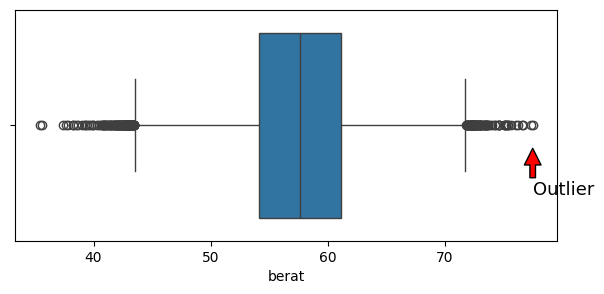

In [6]:
plt.figure(figsize=(7,3))
sns.boxplot(df.berat, orient='h')
plt.annotate("Outlier",(df.berat.max(),0.1),xytext=(df.berat.max(),0.3)
,arrowprops=dict(facecolor='red'),fontsize=13);

In [7]:
df.describe()

,Height(Inches),Weight(Pounds),tinggi,berat
count,25000.000000,25000.000000,25000.000000,25000.000000
mean,67.993114,127.079421,172.702509,57.642209
std,1.901679,11.660898,4.830264,5.289290
min,60.278360,78.014760,153.107034,35.386871
25%,66.704397,119.308675,169.429170,54.117461
50%,67.995700,127.157750,172.709078,57.677738
75%,69.272958,134.892850,175.953312,61.186318
max,75.152800,170.924000,190.888112,77.529759


In [8]:
q1=df.berat.describe()['25%']
q2=df.berat.describe()['50%']
q3=df.berat.describe()['75%']
iqr=q3-q1
batas_bawah=q1-(1.5*iqr)
batas_atas=q3+(1.5*iqr)
print(f"Q1={q1}")
print(f"Q2={q2}")
print(f"Q3={q3}")
print(f"IQR={iqr}")
print(f"batas bawah={batas_bawah}")
print(f"batas atas={batas_atas}")

Q1=54.1174605106
Q2=57.677738138
Q3=61.186317617200004
IQR=7.0688571066000065
batas bawah=43.51417485069999
batas atas=71.78960327710001


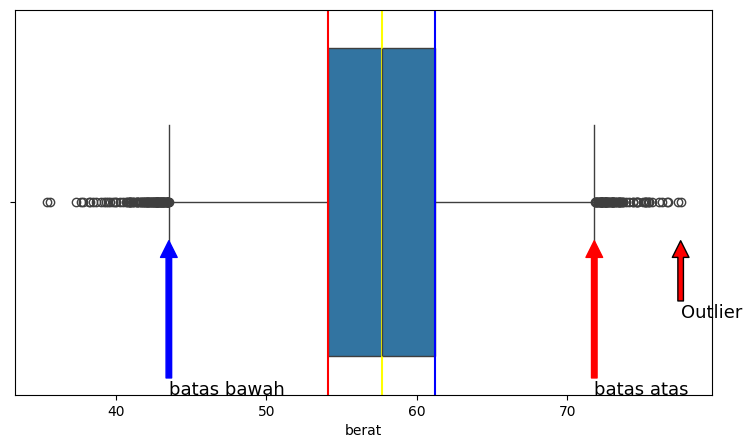

In [9]:
plt.figure(figsize=(9,5))
sns.boxplot(df.berat, orient='h')
plt.annotate("Outlier",(df.berat.max(),0.1),xytext=(df.berat.max(),0.3)
,arrowprops=dict(facecolor='red'),fontsize=13)
plt.axvline(q1,color='red', label='Q1')
plt.axvline(q2,color='yellow', label='Q2')
plt.axvline(q3,color='blue', label='Q3')
plt.annotate('batas bawah',(batas_bawah,0.1),(batas_bawah,0.5),
arrowprops=dict(color='blue'),fontsize=13)
plt.annotate('batas atas',(batas_atas,0.1),(batas_atas,0.5),
arrowprops=dict(color='red'), fontsize=13);

In [10]:
#Sri edy Nurcahyo
q1_tinggi = df.tinggi.describe()['25%']
q2_tinggi = df.tinggi.describe()['50%']
q3_tinggi = df.tinggi.describe()['75%']
iqr_tinggi = q3_tinggi - q1_tinggi
batas_bawah_tinggi = q1_tinggi - (1.5 * iqr_tinggi)
batas_atas_tinggi = q3_tinggi + (1.5 * iqr_tinggi)

print(f"Q1 Tinggi Badan={q1_tinggi}")
print(f"Q2 Tinggi Badan={q2_tinggi}")
print(f"Q3 Tinggi Badan={q3_tinggi}")
print(f"IQR Tinggi Badan={iqr_tinggi}")
print(f"Batas Bawah Tinggi Badan={batas_bawah_tinggi}")
print(f"Batas Atas Tinggi Badan={batas_atas_tinggi}")

Q1 Tinggi Badan=169.42916965
Q2 Tinggi Badan=172.709078
Q3 Tinggi Badan=175.95331205
IQR Tinggi Badan=6.524142399999988
Batas Bawah Tinggi Badan=159.64295605
Batas Atas Tinggi Badan=185.73952564999996


<Axes: >

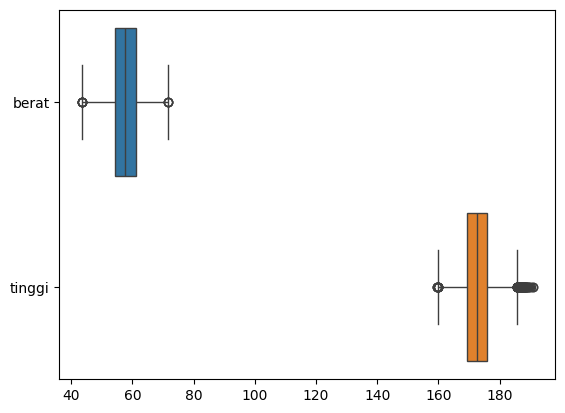

In [27]:
df_n=df[(df.berat>=batas_bawah) & (df.berat<=batas_atas) & (df.tinggi>=batas_bawah_tinggi) & (df.berat<=batas_atas_tinggi) ].copy()
sns.boxplot(data=df_n[['berat','tinggi']], orient='h')

<Axes: >

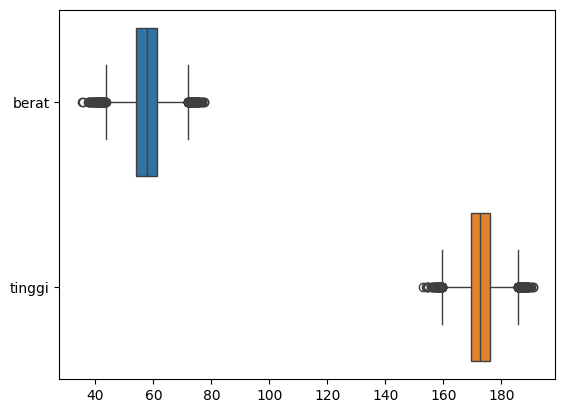

In [21]:
sns.boxplot(data=df[['berat','tinggi']], orient='h')

In [28]:
def minmax(x,x_min,x_max):
  return (x-x_min)/(x_max-x_min)

def standarisasi(x,mean,std):
  return (x-mean)/std

In [31]:
min=df.tinggi.min()
max=df.tinggi.max()
df_n['tinggi_scl']=df_n.apply(lambda x: minmax(x['tinggi'],min,max), axis=1)

In [32]:
min_berat=df.berat.min()
max_berat=df.berat.max()
df_n['berat_scl']=df_n.apply(lambda x: minmax(x['berat'],min_berat,max_berat),axis=1)
df_n.head()

,Height(Inches),Weight(Pounds),tinggi,berat,berat_scl,tinggi_scl
0,65.78331,112.9925,167.089607,51.252494,0.376472,0.370095
1,71.51521,136.4873,181.648633,61.909547,0.629351,0.755447
2,69.39874,153.0269,176.272800,69.411778,0.807370,0.613158
3,68.21660,142.3354,173.270164,64.562199,0.692295,0.533683
4,67.78781,144.2971,172.181037,65.452010,0.713410,0.504856


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [35]:
X=df_n.iloc[:,[4]].values
y=df_n.iloc[:,[5]].values
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
regresi=LinearRegression()
regresi.fit(x_train,y_train)
predict=regresi.predict(x_test)
mae=mean_absolute_error(y_test,predict)
r2=r2_score(y_test,predict)
print(f"MAE : {mae}, R2 : {r2}")

MAE : 0.0880706267749015, R2 : 0.24004431036795737
